# Analyzing and Visualizing Parks Data from OpenStreetMap with Python

This notebook demonstrates how to fetch data on parks from OpenStreetMap (OSM) using the Overpass API, and how to analyze and visualize this data using Python.

## Fetching Data with the Overpass API

Below is an example query to fetch data about parks within a specific bounding box. This is the kind of query you'd run in the Overpass Turbo web interface or through an API request.

In [ ]:
"""
[out:json];
// Set the bounding box (south latitude, west longitude, north latitude, east longitude)
// For example, a bounding box around the central part of New York City
(
  node[\"leisure\"=\"park\"](40.700292, -74.020385, 40.800292, -73.920385);
  way[\"leisure\"=\"park\"](40.700292, -74.020385, 40.800292, -73.920385);
  relation[\"leisure\"=\"park\"](40.700292, -74.020385, 40.800292, -73.920385);
);
// Output the results.
out body;
>;
out skel qt;
"""

## Loading and Visualizing the GeoJSON Data

After fetching the data from Overpass Turbo and saving it as `export.geojson`, we'll load it into a Python environment for analysis using `geopandas`.

                 id               @id @relations  WLAN access addr:city  \
0  relation/1751075  relation/1751075       None  None   None      None   
1  relation/4099553  relation/4099553       None  None   None      None   
2  relation/6802606  relation/6802606       None  None   None  New York   
3  relation/6992452  relation/6992452       None  None   None      None   
4  relation/7095444  relation/7095444       None  None   None  New York   

  addr:country addr:full addr:housenumber addr:postcode  ... start_date  \
0         None      None             None          None  ...       None   
1         None      None             None          None  ...       None   
2         None      None             None         10005  ...       None   
3         None      None             None          None  ...       None   
4         None      None              201         10003  ...       None   

  surface survey:date tourism          type  \
0    None        None    None  multipolygon   
1   

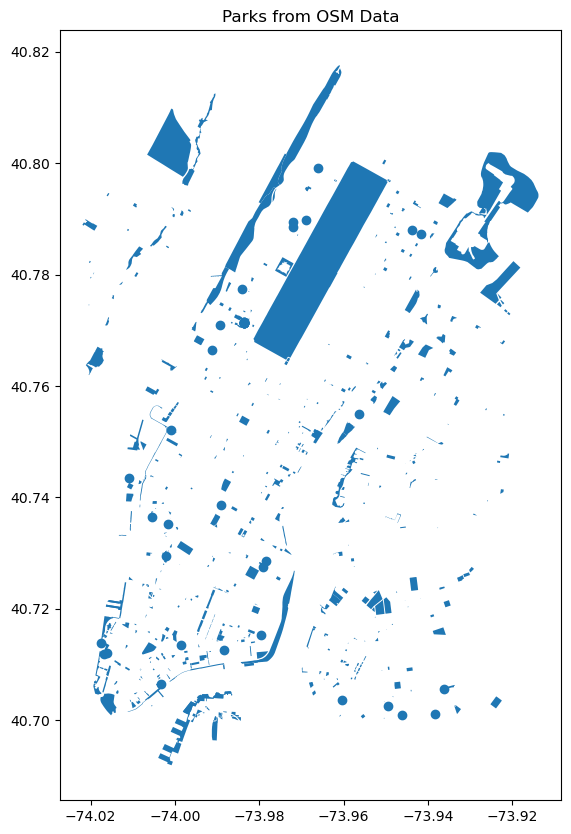

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file
gdf = gpd.read_file('export.geojson')

# Check the GeoDataFrame
print(gdf.head())

# Plot the parks
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)
ax.set_title('Parks from OSM Data')
plt.show()

## Can I Count Something Interesting?
Yes, you can count the number of parks with certain features, such as those that have addr:city specified, indicating they are within city limits, or count parks by type.

In [6]:
# Count parks by city
parks_by_city = gdf['addr:city'].value_counts(dropna=True)
print(parks_by_city)

# Count parks by type
parks_by_type = gdf['type'].value_counts()
print(parks_by_type)

New York            93
Brooklyn            27
Queens               2
Long Island City     2
Sunnyside            1
Roosevelt Island     1
Union City           1
Name: addr:city, dtype: int64
multipolygon    35
Name: type, dtype: int64


## Can I Find Trends?
Finding trends might be challenging without temporal data (e.g., start_date if mostly None) or numeric attributes that vary over time. If there are date-related columns with sufficient non-None values, you could analyze how the number of parks or park features have changed over time.

## Can I Make a Bar Plot or a Histogram?
You can make a bar plot of parks by city or type, based on the counts derived above.

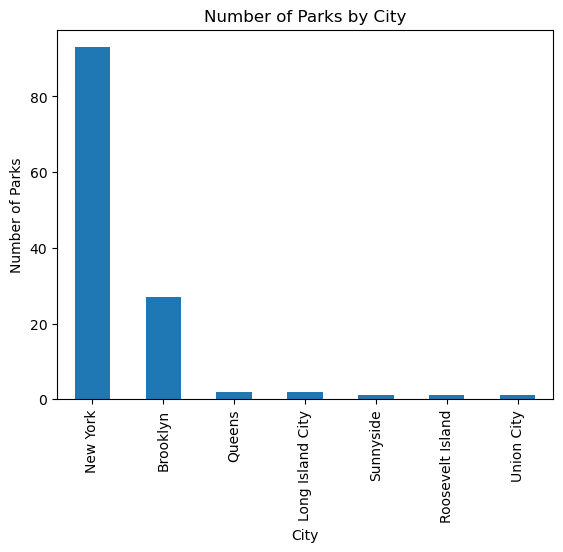

In [7]:
# Plot parks by city
parks_by_city.plot(kind='bar')
plt.title('Number of Parks by City')
plt.xlabel('City')
plt.ylabel('Number of Parks')
plt.show()

# Histogram might be more suited for numerical data, such as the size of parks if you have that data.

Parks by City:
 New York            93
Brooklyn            27
Queens               2
Long Island City     2
Sunnyside            1
Roosevelt Island     1
Union City           1
Name: addr:city, dtype: int64


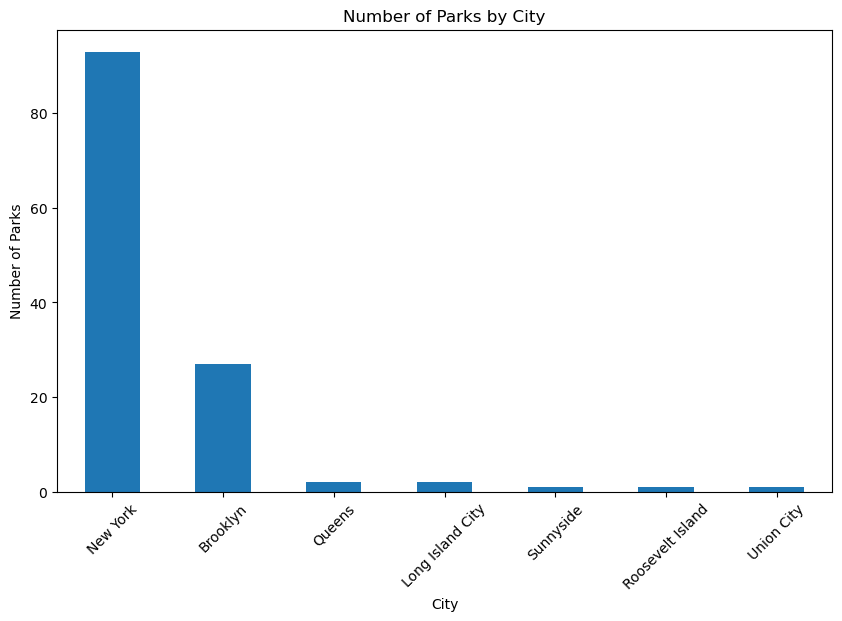

Parks by Type:
 multipolygon    35
Name: type, dtype: int64


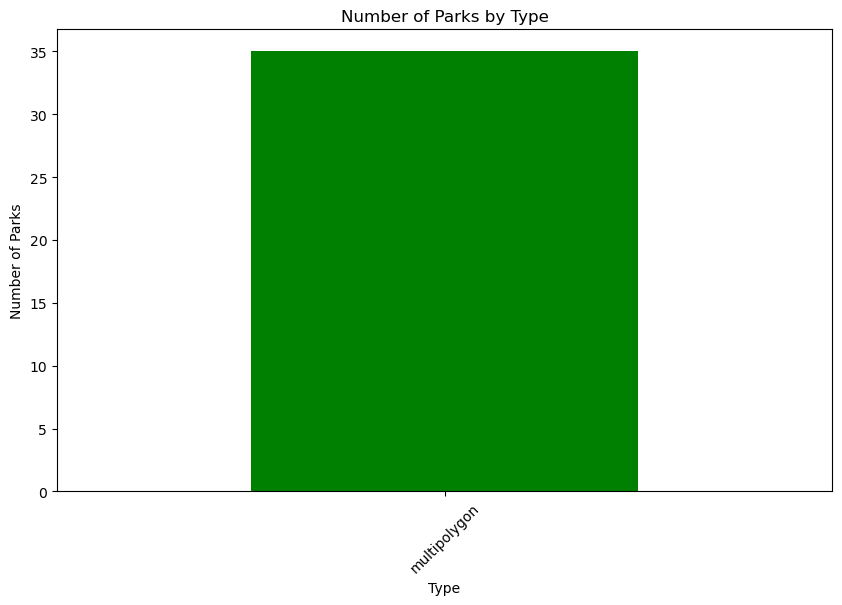

In [8]:
import matplotlib.pyplot as plt

# Ensure the data is loaded
# gdf = gpd.read_file('your_data_file.geojson')

# Count parks by city (excluding NaN values)
parks_by_city = gdf['addr:city'].value_counts().dropna()
print("Parks by City:\n", parks_by_city)

# Plot parks by city
parks_by_city.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Parks by City')
plt.xlabel('City')
plt.ylabel('Number of Parks')
plt.xticks(rotation=45)
plt.show()

# Count parks by type
parks_by_type = gdf['type'].value_counts()
print("Parks by Type:\n", parks_by_type)

# Plot parks by type
parks_by_type.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Number of Parks by Type')
plt.xlabel('Type')
plt.ylabel('Number of Parks')
plt.xticks(rotation=45)
plt.show()

## Notes / Insight
### Insights on Parks by City/Area:

1. **Predominance in New York (Manhattan)**: With 93 parks, the "New York" label, which typically refers to Manhattan in the context of the NYC boroughs, suggests a high density or priority of park spaces in Manhattan compared to other boroughs or nearby cities.

2. **Brooklyn's Green Spaces**: Brooklyn, with 27 parks, also shows a significant emphasis on green spaces but has considerably fewer parks than Manhattan, indicating differences in urban planning, land availability, or population density.

3. **Limited Green Spaces in Queens and Beyond**: Queens and Long Island City have notably fewer parks listed (2 each), with Sunnyside, Roosevelt Island, and Union City having even fewer (1 each). This could reflect a disparity in green space allocation or reporting differences in OSM data.

### Insights on Parks by Type:

1. **Multipolygon Parks**: All parks in the dataset categorized by type are labeled as "multipolygon," suggesting they are composed of multiple areas (e.g., separated by roads or water bodies) but considered as a single park entity. This might indicate the complexity and diversity of park layouts in urban environments.

### Potential Areas for Further Investigation:

1. **Urban Planning and Equity**: The distribution of parks across different areas could indicate patterns of urban development and social equity. Investigating whether park distribution correlates with population density, socio-economic factors, or historical development patterns could provide deeper insights into urban equity and accessibility.

2. **Impact on Local Communities**: Exploring how the presence of parks affects local communities in terms of health outcomes, property values, community engagement, and environmental benefits could highlight the importance of equitable green space distribution.

3. **Comparative Analysis with Population Data**: Comparing the number of parks and their distribution with population data for each area could reveal insights into park accessibility and per capita green space availability.

4. **Spatial Distribution and Connectivity**: Understanding how parks are spatially distributed and connected within and across neighborhoods could offer insights into the urban green infrastructure's effectiveness and potential areas for improvement.

5. **Park Features and Amenities**: Further investigation into the features and amenities available in parks (e.g., playgrounds, sports facilities, water bodies) could inform discussions on park quality versus quantity and their roles in serving community needs.

6. **Policy and Planning Implications**: The insights gained could inform policy discussions and urban planning strategies aimed at improving green space accessibility, enhancing the quality of existing parks, and ensuring equitable distribution of urban green spaces.

These insights underline the importance of parks in urban environments and highlight potential areas for further research and policy consideration to enhance urban livability, sustainability, and equity.